<a href="https://colab.research.google.com/github/Ashan-TUF/Regression_with_TensorFlow/blob/main/Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install opendatasets

In [16]:
import pandas as pd #To work with our dataset
import matplotlib.pyplot as plt #For data visualization
import tensorflow as tf #To build a neural network
import opendatasets as od #To download a dataset from Kaggle

Download Dataset

In [18]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression") #This is a link to a Kaggle dataset.

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ashankavinduai
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 6.24MB/s]

In [19]:
data = pd.read_csv("random-linear-regression/test.csv")

In [21]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [22]:
data.shape

(300, 2)

In [23]:
x = data['x']
y = data['y']

In [24]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [25]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


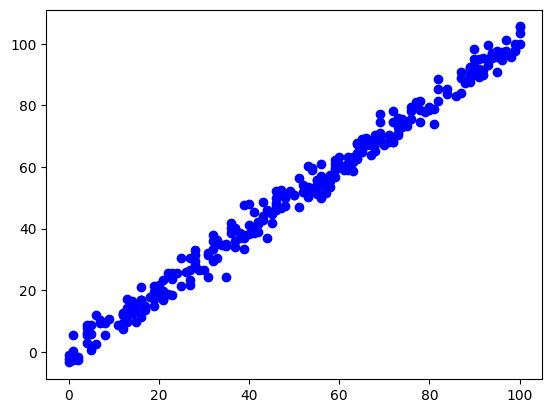

In [26]:
plt.scatter(x,y,c ='b') #'b' is the color blue
plt.show()

###Make Train dataset and Test dataset

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [28]:
x_train.shape,x_test.shape

((240,), (60,))

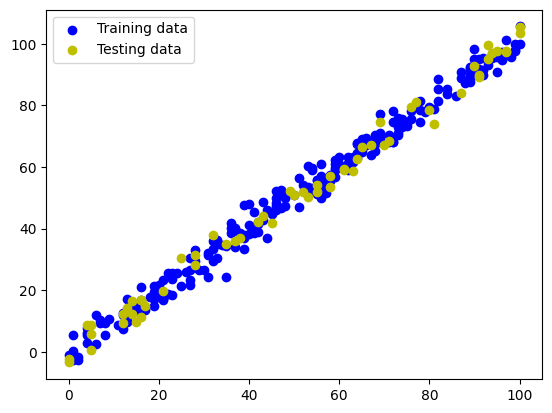

In [29]:
plt.scatter(x_train,y_train, c='b', label= 'Training data')
plt.scatter(x_test,y_test, c='y', label = 'Testing data')
plt.legend()
plt.show()

#Model Building

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=[1]),
    tf.keras.layers.Dense(1)
    ])